/Users/melanie/anaconda2/lib/python2.7/site-packages/matplotlib/artist.py:224: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


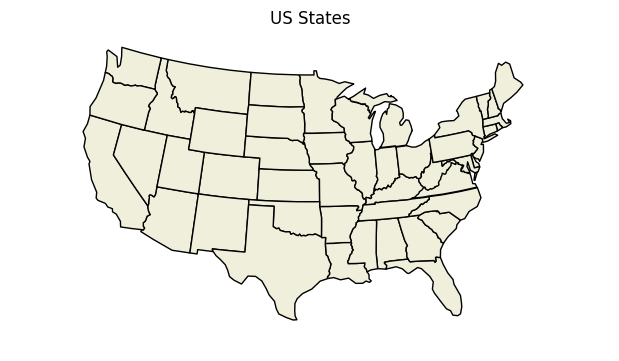

In [1]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

def main():
    ax = plt.axes([0, 0, 1, 1],
                  projection=ccrs.LambertConformal())

    ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

    shapename = 'admin_1_states_provinces_lakes_shp'
    states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)
    
    # to get the effect of having just the states without a map "background"
    # turn off the outline and background patches
    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)

    plt.title('US States')
    
    for state in shpreader.Reader(states_shp).geometries():
        # pick a default color for the land with a black outline,
        # this will change if the storm intersects with our track
        facecolor = [0.9375, 0.9375, 0.859375]
        edgecolor = 'black'

        #if state.intersects(track):
        #    facecolor = 'red'
        #elif state.intersects(track_buffer):
        #    facecolor = '#FF7E00'

        ax.add_geometries([state], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor=edgecolor)

    #ax.add_geometries([track_buffer], ccrs.PlateCarree(),
    #                  facecolor='#C8A2C8', alpha=0.5)
    #ax.add_geometries([track], ccrs.PlateCarree(),
    #                  facecolor='none')
    
    # # make two proxy artists to add to a legend
    #direct_hit = mpatches.Rectangle((0, 0), 1, 1, facecolor="red")
    #within_2_deg = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FF7E00")
    #labels = ['State directly intersects\nwith track',
    #          'State is within \n2 degrees of track']
    #plt.legend([direct_hit, within_2_deg], labels,
    #           loc='lower left', bbox_to_anchor=(0.025, -0.1), fancybox=True)

    plt.show()


if __name__ == '__main__':
    main()